# Installing dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Load data and look at it

In [4]:
result= pd.read_pickle("/content/drive/MyDrive/Stock+Sentiment_Twitter.pkl")
#df_new = pd.read_pickle("/content/drive/MyDrive/data_to_paper_twitter_case.pkl")

result.shape
result.index

Int64Index([  4,   6,   7,   9,  11,  13,  14,  15,  17,  19,
            ...
            166, 167, 168, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64', length=134)

In [5]:
result.head()

,Time,Date,News source,Title,Description,index,timestamp,uid,url,url_uid,phrase_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_oncomplete_text,sentimental_analysis_oncomplete_text_average,Stock
4,06/11/13,"Nov 6, 2013",USA Today,All eyes on NYSE for Twitter IPO,Twitter IPO comes after embarrassing technolog...,2,1650830000000.0000,rm2XVZbnbmSWhxVqHhRI,https://www.google.com/search?q=nyse:twtr+news...,1,['Twitter IPO comes after embarrassing technol...,[-0.6486],-0.6486,-0.6486,-0.6486,44.9000
6,02/01/14,"Jan 2, 2014",The Motley Fool,Twitter and LinkedIn Get a Different Start to ...,The S&P 500 and the Dow were down 0.9% and 0.8...,110,1650830000000.0000,QjaElbqhaGl7ocUvSscA,https://www.google.com/search?q=nyse:twtr+news...,11,"['The S&P 500 and the Dow were down 0', '9% an...",[0.34 0.3804],0.3602,0.6115,0.6115,69.0000
7,10/02/14,"Feb 10, 2014",The Motley Fool,Has Twitter's Growth Sputtered to a Halt?,While Twitter (NYSE:TWTR) has been on a steady...,72,1650830000000.0000,v36D3SSuY1b8E84J1E1A,https://www.google.com/search?q=nyse:twtr+news...,8,['While Twitter (NYSE:TWTR) has been on a stea...,[0.3818],0.3818,0.3818,0.3818,54.0000
9,13/05/14,"May 13, 2014",The Motley Fool,"Despite the Recent Drop, Twitter Is Outperform...","However, the long-term investing thesis hasn't...",207,1650830000000.0000,Eue66YhW0TwSshTu9E61,https://www.google.com/search?q=nyse:twtr+news...,21,"[""However, the long-term investing thesis hasn...",[0.4767],0.4767,0.4767,0.4767,32.8500
11,26/03/15,"Mar 26, 2015",The Motley Fool,Why 1 Wall Street Firm Believes Twitter Inc. M...,What: Shares of social media networking giant ...,246,1650830000000.0000,iuAejrBDjUICuuIIpEEv,https://www.google.com/search?q=nyse:twtr+news...,25,['What: Shares of social media networking gian...,[0.296],0.2960,0.2960,0.2960,50.0100


In [6]:
result.tail()

,Time,Date,News source,Title,Description,index,timestamp,uid,url,url_uid,phrase_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_oncomplete_text,sentimental_analysis_oncomplete_text_average,Stock
173,14/02/22,"Feb 14, 2022",Seeking Alpha,Tepper's Appaloosa takes new stake in General ...,... Closed positions in Paysafe (NYSE:PSFE) fr...,63,1650830000000.0000,pA6JQ8s8ottaoY7Dp4po,https://www.google.com/search?q=nyse:twtr+news...,7,"['', '', '', ' Closed positions in Paysafe (NY...",[0.5106],0.5106,0.5106,0.5106,36.9800
174,14/02/22,"Feb 14, 2022",Benzinga,Cathie Wood Sells Another $2.5M In Twitter Sha...,"Ark Invest sold 71,418 shares — estimated to b...",166,1650830000000.0000,YnW8R6wBSRQkmAgqk4vV,https://www.google.com/search?q=nyse:twtr+news...,17,"['Ark Invest sold 71,418 shares — estimated to...",[ 0.4767 -0.296 ],0.0903,0.2263,0.2263,36.9800
175,14/02/22,"Feb 14, 2022",TipRanks,Twitter to Repurchase Common Shares Worth $2B;...,"Twitter, Inc. (NYSE: TWTR) has signed accelera...",125,1650830000000.0000,X6sIvYKOcI0YWhuKjtEU,https://www.google.com/search?q=nyse:twtr+news...,13,"['Twitter, Inc', ' (NYSE: TWTR) has signed acc...",[0.5106],0.5106,0.5106,0.5106,36.9800
176,15/02/22,"Feb 15, 2022",Simply Wall St,"Although Twitter, Inc. (NYSE:TWTR) Declined, I...",Net loss: US$221.4m (loss narrowed 81% from FY...,11,1650830000000.0000,U32ru7utJrdmxTGgOhdO,https://www.google.com/search?q=nyse:twtr+news...,2,"['Net loss: US$221', '4m (loss narrowed 81% fr...",[-0.3182 -0.3182],-0.3182,-0.5574,-0.5574,36.2400
177,16/02/22,"Feb 16, 2022",The Motley Fool,Is Twitter Stock a Buy Now?,Key Points · NYSE: TWTR · The social media com...,84,1650830000000.0000,nmGyEw5mu9lKlKLnLMdS,https://www.google.com/search?q=nyse:twtr+news...,9,['Key Points · NYSE: TWTR · The social media c...,[0.4404],0.4404,0.4404,0.4404,35.4300


Scalling closing prices 

In [7]:
# original time serie (Y)
y = result.Stock.values 
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)

# Using sentiment analysis split by dot 

In [8]:
X = result.sentimental_analysis_split_by_dot_average.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:len(X),:]

In [9]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [10]:
look_back = 7


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)

In [11]:
model = Sequential()
model.add(LSTM(8000, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=25, batch_size=25, validation_data=(X_test_all_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8000)              256256000 
                                                                 
 dropout (Dropout)           (None, 8000)              0         
                                                                 
 dense (Dense)               (None, 1)                 8001      
                                                                 
Total params: 256,264,001
Trainable params: 256,264,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.metrics import r2_score

train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)




#train_predict = scaler.inverse_transform(train_predict)
#Y_train = scaler.inverse_transform(y_train)
#test_predict = scaler.inverse_transform(test_predict)
#Y_test = scaler.inverse_transform(y_test)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))
print(f'R-square= {r2_score(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])}')

Train Mean Absolute Error: 0.056365166
Train Root Mean Squared Error: 0.075765245
Test Mean Absolute Error: 0.03450821
Test Root Mean Squared Error: 0.038985774
R-square= 0.9256989142456313


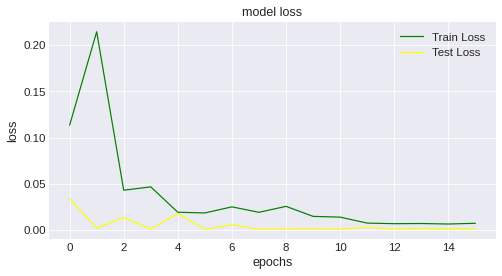

In [13]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

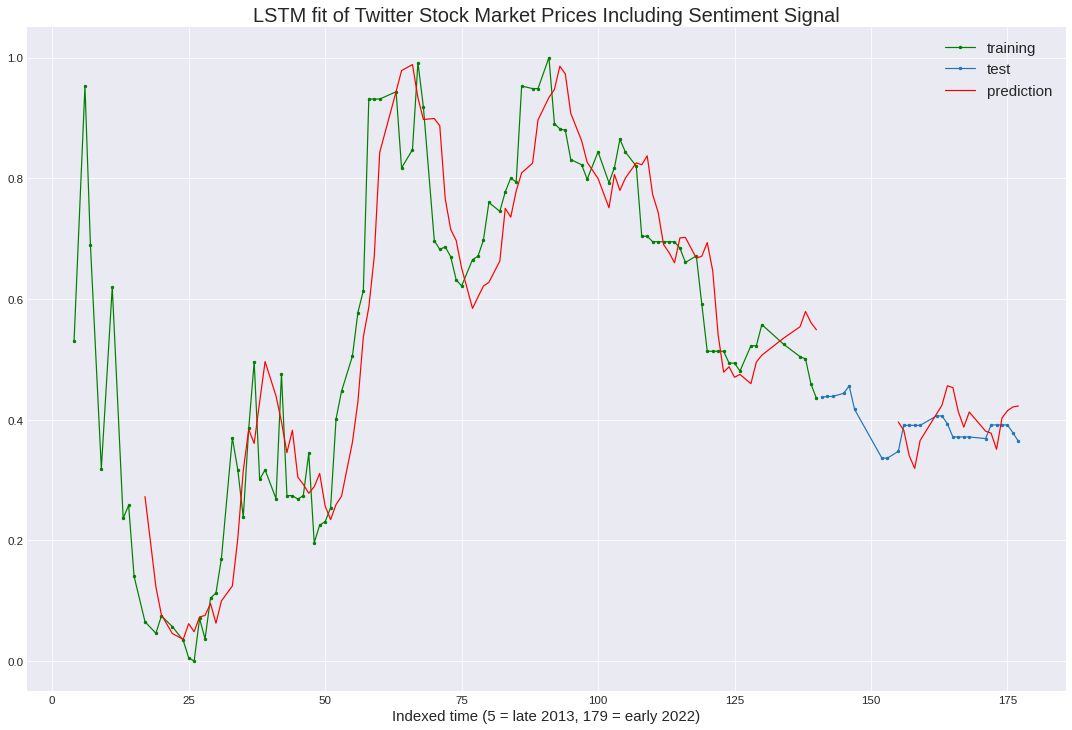

In [14]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[8:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[8:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM fit of Twitter Stock Market Prices Including Sentiment Signal",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('Indexed time (5 = late 2013, 179 = early 2022)', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

# Using whole news description without splitting text

In [15]:
# extra information: features of the sentiment analysis
X = result.sentimental_analysis_oncomplete_text_average.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:len(X),:]

In [16]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [17]:
look_back = 7


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)

In [18]:
model = Sequential()
model.add(LSTM(8000, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=25, batch_size=20, validation_data=(X_test_all_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8000)              256256000 
                                                                 
 dropout_1 (Dropout)         (None, 8000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 8001      
                                                                 
Total params: 256,264,001
Trainable params: 256,264,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)




#train_predict = scaler.inverse_transform(train_predict)
#Y_train = scaler.inverse_transform(y_train)
#test_predict = scaler.inverse_transform(test_predict)
#Y_test = scaler.inverse_transform(y_test)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))
print(f'R-square= {r2_score(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])}')

Train Mean Absolute Error: 0.05509755
Train Root Mean Squared Error: 0.07300277
Test Mean Absolute Error: 0.032996196
Test Root Mean Squared Error: 0.03610315
R-square= 0.9310183177514731


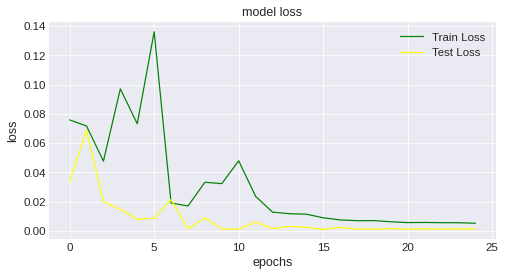

In [20]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

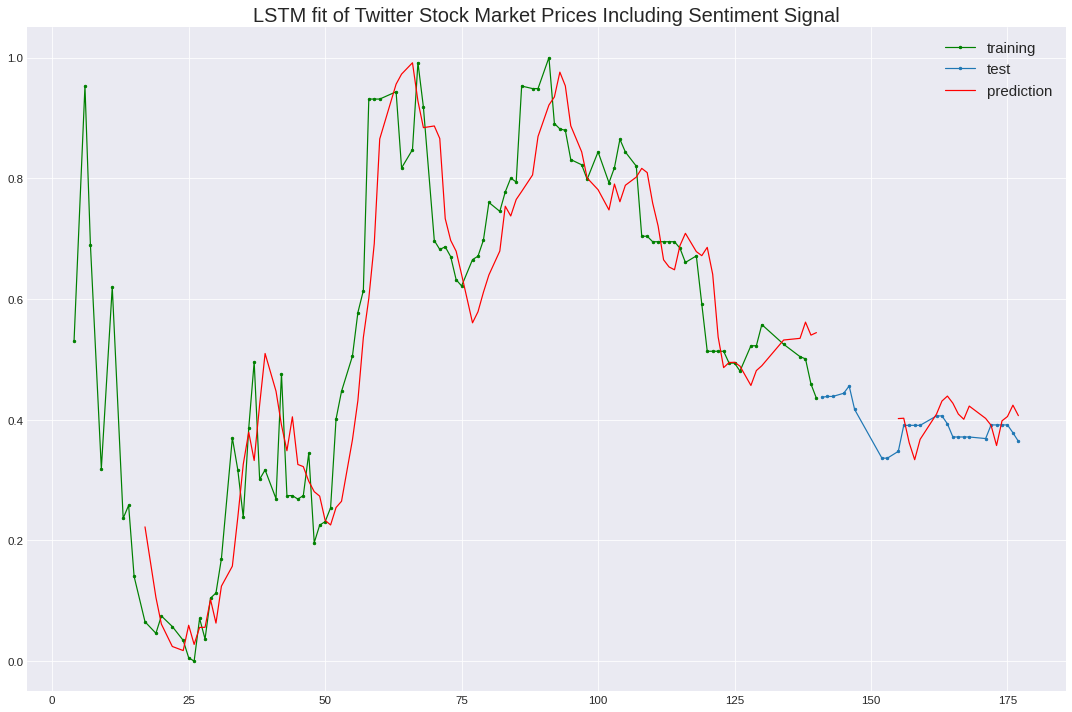

In [21]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[8:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[8:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM fit of Twitter Stock Market Prices Including Sentiment Signal",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();